In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

from scipy.interpolate import interp1d

In [2]:
#Baixando a base de dados 

data=pd.read_csv('previsao_de_renda_II.csv')
data.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_ref               750000 non-null  object 
 1   index                  750000 non-null  int64  
 2   sexo                   750000 non-null  object 
 3   posse_de_veiculo       750000 non-null  object 
 4   posse_de_imovel        750000 non-null  object 
 5   qtd_filhos             750000 non-null  int64  
 6   tipo_renda             750000 non-null  object 
 7   educacao               750000 non-null  object 
 8   estado_civil           750000 non-null  object 
 9   tipo_residencia        750000 non-null  object 
 10  idade                  750000 non-null  int64  
 11  tempo_emprego          624240 non-null  float64
 12  qt_pessoas_residencia  750000 non-null  float64
 13  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(8)
m

## Avaliando valores missing e substituindo pela média

In [4]:
data.isna().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

- Substituindo os valores faltantes com a média 

In [5]:
data.fillna(data['tempo_emprego'].mean(),inplace=True)

- Separandos os três ultimos meses como base teste

## Base de teste

In [6]:
#Verificando os meses que aparece na base
data['data_ref'].value_counts()

2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: data_ref, dtype: int64

In [7]:
#Separando os três ultimos meses como base teste
teste=data[data['data_ref']>'2015-12-01']
teste['data_ref'].value_counts()

2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: data_ref, dtype: int64

In [8]:
#Separando a base que vamos treinar o modelo
data=data[data['data_ref']<'2016-01-01']
data['data_ref'].value_counts()

2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
Name: data_ref, dtype: int64

In [9]:
data.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

Avaliando o modelo com $R^2 ajustado$

In [10]:
res_modelo = smf.ols('''np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia''',data=data).fit()
res_modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.947e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:13:15   Log-Likelihood:            -7.9748e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599975   BIC:                         1.595e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.6405      0.048    160.310      0.000       7.547       7.734
sexo[T.M]                            0.1354      0.003     48.568      0.000       0.130       0.141
posse_de_veiculo[T.S]                0.0055      0.003      2.087      0.037       0.000       0.011
posse_de_imovel[T.S]                 0.1852      0.003     71.417      0.000       0.180       0.190
tipo_renda[T.Bolsista]              -0.2166      0.052     -4.129      0.000      -0.319      -0.114
tipo_renda[T.Empresário]             0.1452      0.003     48.527      0.000       0.139       0.151
tipo_renda[T.Pensionista]           -0.2974      0.004    -69.709      0.000      -0.306      -0.289
tipo_renda[T.Servidor público]       0.1333      0.004     30.253      0.000       0.125       0.142
educacao[T.Médio]                    0.0301      0.011      2.689      0.007       0.008       0.052
educacao[T.Pós graduação]            0.1542      0.038      4.043      0.000       0.079       0.229
educacao[T.Superior completo]        0.1233      0.011     10.896      0.000       0.101       0.146
educacao[T.Superior incompleto]      0.0434      0.013      3.424      0.001       0.019       0.068
estado_civil[T.Separado]             0.1793      0.023      7.792      0.000       0.134       0.224
estado_civil[T.Solteiro]             0.1614      0.023      7.151      0.000       0.117       0.206
estado_civil[T.União]                0.0097      0.005      2.161      0.031       0.001       0.019
estado_civil[T.Viúvo]                0.1634      0.023      7.027      0.000       0.118       0.209
tipo_residencia[T.Casa]             -0.0881      0.010     -8.651      0.000      -0.108      -0.068
tipo_residencia[T.Com os pais]      -0.0557      0.012     -4.823      0.000      -0.078      -0.033
tipo_residencia[T.Comunitário]      -0.1404      0.021     -6.835      0.000      -0.181      -0.100
tipo_residencia[T.Estúdio]          -0.1408      0.017     -8.203      0.000      -0.174      -0.107
tipo_residencia[T.Governamental]    -0.0942      0.012     -7.773      0.000      -0.118      -0.070
qtd_filhos                          -0.1498      0.022     -6.668      0.000      -0.194      -0.106
idade                                0.0042      0.000     26.893      0.000       0.004       0.004
tempo_emprego                        0.1290      0.000    619.711      0.000       0.129       0.129
qt_pessoas_residencia                0.1554      0.022      6.929      0.000       0.111       0.199
==============================================================================
Omnibus:                     1088.041   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              957.929
Skew:             

- Todas as variavéis incluidas no modelo são significamente importantes para explicar a renda (variável predita), no entanto o modelo ainda não é muito explicativo. Vou tentar melhor o modelo. 

In [11]:
print(f'O R2 do modelo é : {res_modelo.rsquared:.2%}')

O R2 do modelo é : 43.78%


## Análise de perfil 

In [12]:
#Categorizando a variável tempo_emprego em 20 quantis
data['tempo_emprego_cat'], quebras = pd.qcut(data['tempo_emprego'], 20, duplicates='drop', retbins=True)
data
y_media = pd.DataFrame()

#Criando uma variáveis com a quantidade de observações por quartil
y_media['qtd_observacoes'] = data.groupby('tempo_emprego_cat')['renda'].count()

#Criando uma variável com a média de renda por quartil
y_media['renda'] = data.groupby('tempo_emprego_cat')['renda'].mean()

#Criando uma variável com o log da renda
data['log_renda']=np.log(data['renda'])

#Criando uma variável com a média do log da renda por quartil
y_media['media_log_renda'] = data.groupby('tempo_emprego_cat')['log_renda'].mean()

#Criando uma variável com a média do tempo_emprego por quartil
y_media['media_tempo_emprego'] = data.groupby('tempo_emprego_cat')['tempo_emprego'].mean()


In [13]:
y_media

,qtd_observacoes,renda,media_log_renda,media_tempo_emprego
tempo_emprego_cat,,,,
"(0.11699999999999999, 0.816]",30234,6406.615090,8.364965,0.515042
"(0.816, 1.458]",30031,7316.772629,8.454323,1.125014
"(1.458, 2.096]",29736,8037.073066,8.569544,1.781261
"(2.096, 2.912]",30013,8674.879755,8.624148,2.510920
"(2.912, 3.636]",30408,9762.372783,8.755365,3.301180
"(3.636, 4.299]",29625,11041.231269,8.855078,3.987156
"(4.299, 4.934]",30109,11396.170754,8.903273,4.610421
"(4.934, 5.759]",29991,12888.668890,9.049495,5.367829
"(5.759, 6.622]",30003,13859.133577,9.139216,6.205546


<AxesSubplot:xlabel='media_log_renda', ylabel='media_tempo_emprego'>

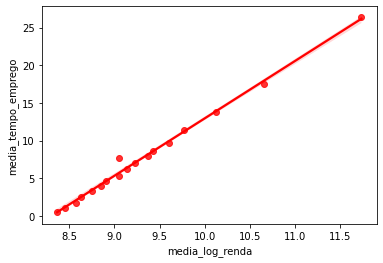

In [14]:

sns.regplot(y='media_tempo_emprego',x='media_log_renda',color='r',data=y_media)

- Transformação da variável tornou os dados observados de uma forma que muito linear onde é possível traçar uma reta com moir facilidade. 

In [15]:
res = smf.ols('media_log_renda ~ media_tempo_emprego',data=y_media).fit()
res.summary()


C:\Users\General\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        media_log_renda   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2400.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           7.28e-19
Time:                        19:13:21   Log-Likelihood:                 23.144
No. Observations:                  18   AIC:                            -42.29
Df Residuals:                      16   BIC:                            -40.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.3054      0.027    312.879      0.000       8.249       8.362
media_tempo_emprego     0.1302      0.003     48.992      0.000       0.125       0.136
==============================================================================
Omnibus:                       39.163   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.156
Skew:                          -3.200   Prob(JB):                     1.46e-23
Kurtosis:                      12.963   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
data

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_cat,log_renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,"(15.214, 20.216]",9.318131
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,"(9.082, 10.436]",7.793508
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,"(8.107, 9.082]",9.528769
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,"(0.816, 1.458]",7.767196
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,"(0.816, 1.458]",6.673020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,2.0,1893.35,"(4.299, 4.934]",7.546103
599996,2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.0,3080.48,"(2.096, 2.912]",8.032841
599997,2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20,"(0.11699999999999999, 0.816]",8.543095
599998,2015-12-01,15500,F,S,S,1,Empresário,Superior completo,Solteiro,Casa,27,6.791781,2.0,20449.25,"(6.622, 7.471]",9.925701


R2 ao realizar a usar a tecnica de segmentação 38.80% 


C:\Users\General\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<AxesSubplot:xlabel='media_log_renda', ylabel='media_tempo_emprego'>

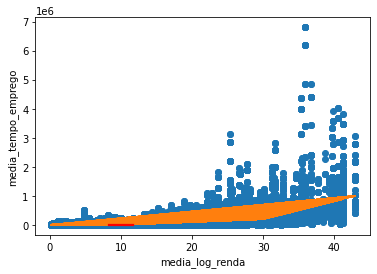

In [18]:
# Resegmentação 
c1=10
c2=30
data['x_1']=(data.tempo_emprego<=c1)* data.tempo_emprego + (data.tempo_emprego>c1)*c1
data['x_2']=(data.tempo_emprego<=c1)*0 + ((data.tempo_emprego>c1) & (data.tempo_emprego<=c2))*(data.tempo_emprego-c1)+ (data.tempo_emprego>c2)*(c2-c1)
data['x_3']=(data.tempo_emprego<=c2)*0+(data.tempo_emprego>c2)*(data.tempo_emprego-c2)

res_segmentacao=sm.OLS(data['renda'],data['tempo_emprego']).fit()
res_segmentacao=smf.ols('renda ~ x_1 + x_2+ x_3',data=data).fit()
print(f'R2 ao realizar a usar a tecnica de segmentação {res_segmentacao.rsquared:.2%} ')
res.summary()
fig,ax=plt.subplots()
ax.plot(data.tempo_emprego,data.renda,'o',label='Dados observados',alpha=1)
ax.plot(data.tempo_emprego,res_segmentacao.predict())
sns.regplot(y='media_tempo_emprego',x='media_log_renda',color='r',data=y_media)

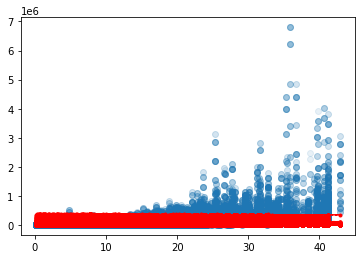

In [19]:
#Lowess

lowess=sm.nonparametric.lowess(data['renda'],data['tempo_emprego'],frac=2/4)
lowess_y=lowess[:,1 ]
lowess_x=lowess[:,0 ]
fig,ax=plt.subplots()
ax.plot(data.tempo_emprego,data.renda,'o',label='Dados observados',alpha=0.1)
ax.plot(data.tempo_emprego,lowess_y,'r--.',label='lowess')

In [20]:
f=interp1d(lowess_x,lowess_y,bounds_error=False)
data['x1_lowess']=f(data.tempo_emprego)

In [21]:
res_lowess=smf.ols('renda ~ x1_lowess',data=data).fit()
print(f'R2 com a tecnica Lowess {res_lowess.rsquared:.2%}')


R2 com a tecnica Lowess 35.23%


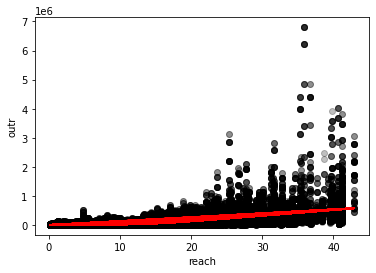

In [22]:
plt.plot(data['tempo_emprego'],data['renda'],'ko',label='data',alpha=0.25)
plt.plot(data['tempo_emprego'],res_lowess.predict(),'r--',label='predict')
plt.xlabel('reach')
plt.ylabel('outr')
plt.show()

- A tecnica de categorização teve uma perfomace melhor como podemos visualizar. 

In [23]:
print(f'R2 com a tecnica Lowess {res_lowess.rsquared:.2%}')
print(f'R2 ao realizar a usar a tecnica de segmentação {res_segmentacao.rsquared:.2%} ')
print(f'O R2 do modelo é : {res_modelo.rsquared:.2%}')

R2 com a tecnica Lowess 35.23%
R2 ao realizar a usar a tecnica de segmentação 38.80% 
O R2 do modelo é : 43.78%
